In [1]:
import sys
sys.path.append('../')
# from utils import *
# from processing import *
# from analysis import *
#import model
import matplotlib.pyplot as plt
#from umap.parametric_umap import ParametricUMAP
from sklearn.cluster import KMeans, SpectralClustering
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import gaussian_kde
from processing import *


          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
bcorr,  fastclean,  Fitter,  gaussenh,  Linear_prediction,  Peaks,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
diagonal_2DMS,  FTMS_calib,  PhaseMS, 


In [2]:
vae_subspace = model.VAE_model('../processed_data/coronal3D_propagated_decoded.h5')

In [3]:
train_data = vae_subspace.get_training_data(ratio = 0.1, group_to_select=vae_subspace.group_names)

sample 3966 of pixels for training data from slide1_2_R00
sample 4297 of pixels for training data from slide1_2_R01
sample 3992 of pixels for training data from slide1_2_R02
sample 4360 of pixels for training data from slide1_2_R03
sample 4101 of pixels for training data from slide1_2_R04
sample 4362 of pixels for training data from slide1_2_R05
sample 4475 of pixels for training data from slide1_2_R06
sample 4551 of pixels for training data from slide1_2_R07
sample 4631 of pixels for training data from slide1_2_R08
sample 4428 of pixels for training data from slide3_5_R00
sample 4670 of pixels for training data from slide3_5_R01
sample 4701 of pixels for training data from slide3_5_R02
sample 4564 of pixels for training data from slide3_5_R03
sample 4824 of pixels for training data from slide3_5_R04
sample 4329 of pixels for training data from slide3_5_R05
sample 2950 of pixels for training data from slide3_5_R06
sample 2963 of pixels for training data from slide3_5_R07
sample 3088 of

In [4]:
vae_subspace.paraUMAP_train(train_data/train_data.mean(1).reshape(-1,1), 10, False)

ParametricUMAP(decoder=<tensorflow.python.keras.engine.functional.Functional object at 0x000001707A613DF0>,
               encoder=<tensorflow.python.keras.engine.functional.Functional object at 0x000001707A605700>,
               n_training_epochs=2,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001707A677D60>)
Construct fuzzy simplicial set
Mon Oct 18 10:05:54 2021 Finding Nearest Neighbors
Mon Oct 18 10:05:54 2021 Building RP forest with 24 trees
Mon Oct 18 10:06:04 2021 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Mon Oct 18 10:06:18 2021 Finished Nearest Neighbor Search
Mon Oct 18 10:06:21 2021 Construct embedding


c:\users\richard\appdata\local\programs\python\python38\lib\site-packages\umap\parametric_umap.py:269: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  warn(


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.1001
Epoch 2/20
1628/1628 [==============================] - 20s 13ms/step - loss: 0.0979
Epoch 3/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.0974
Epoch 4/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.0971
Epoch 5/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.0968
Epoch 6/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.0966
Epoch 7/20
1628/1628 [==============================] - 21s 13ms/step - loss: 0.0963
Epoch 8/20
1628/1628 [==============================] - 22s 13ms/step - loss: 0.0962
Epoch 9/20
1628/1628 [==============================] - 22s 13ms/step - loss: 0.0961
Epoch 10/20
1628/1628 [==============================] - 22s 13ms/step - loss: 0.0957
Epoch 11/20

In [68]:
with open('../processed_data/coronal3D_train_embedding_UMAP.pkl', 'wb') as f:
    pickle.dump(vae_subspace.train_embedding_UMAP, f, protocol=pickle.HIGHEST_PROTOCOL)

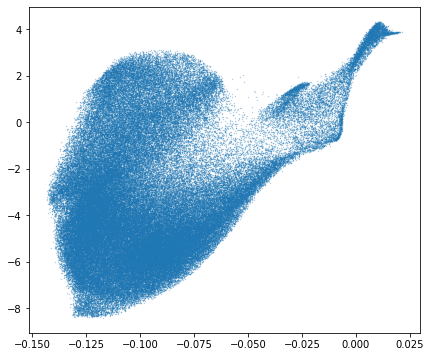

In [6]:
x = vae_subspace.train_embedding_UMAP[:,0]
y = vae_subspace.train_embedding_UMAP[:,1]
# from scipy.stats import gaussian_kde
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots( figsize=(7,6))
sc = ax.scatter(x,y,s=0.1,alpha=0.5,rasterized=True)

Text(0.5, 0, 'Epoch')

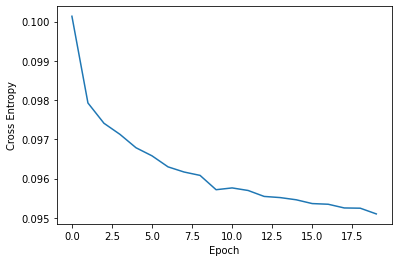

In [7]:
fig, ax = plt.subplots()
ax.plot(vae_subspace.embedder_UMAP._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [8]:
vae_subspace.paraUMAP_predict()

predicting slices...
embedding slide1_2_R00
40/40 [==============================] - 0s 3ms/step
embedding slide1_2_R01
43/43 [==============================] - 0s 3ms/step
embedding slide1_2_R02
42/42 [==============================] - 0s 3ms/step
embedding slide1_2_R03
44/44 [==============================] - 0s 3ms/step
embedding slide1_2_R04
41/41 [==============================] - 0s 3ms/step
embedding slide1_2_R05
44/44 [==============================] - 0s 3ms/step
embedding slide1_2_R06
45/45 [==============================] - 0s 3ms/step
embedding slide1_2_R07
46/46 [==============================] - 0s 3ms/step
embedding slide1_2_R08
47/47 [==============================] - 0s 3ms/step
embedding slide3_5_R00
45/45 [==============================] - 0s 3ms/step
embedding slide3_5_R01
47/47 [==============================] - 0s 3ms/step
embedding slide3_5_R02
47/47 [==============================] - 0s 3ms/step
embedding slide3_5_R03
47/47 [==============================] - 0s 

In [15]:
with open('../processed_data/Coronal3D_UMAP_datainfo_decoded.pkl', 'wb') as f:
    pickle.dump(vae_subspace.data_info, f, protocol=3)

In [2]:
with open('../processed_data/Coronal3D_UMAP_datainfo_decoded.pkl', 'rb') as fp:
    UMAP_datainfo = pickle.load(fp)

In [3]:
groups_show = [slice_order[9],'slide4_6_R04','slide7_R00']

NameError: name 'slice_order' is not defined

NameError: name 'groups_show' is not defined

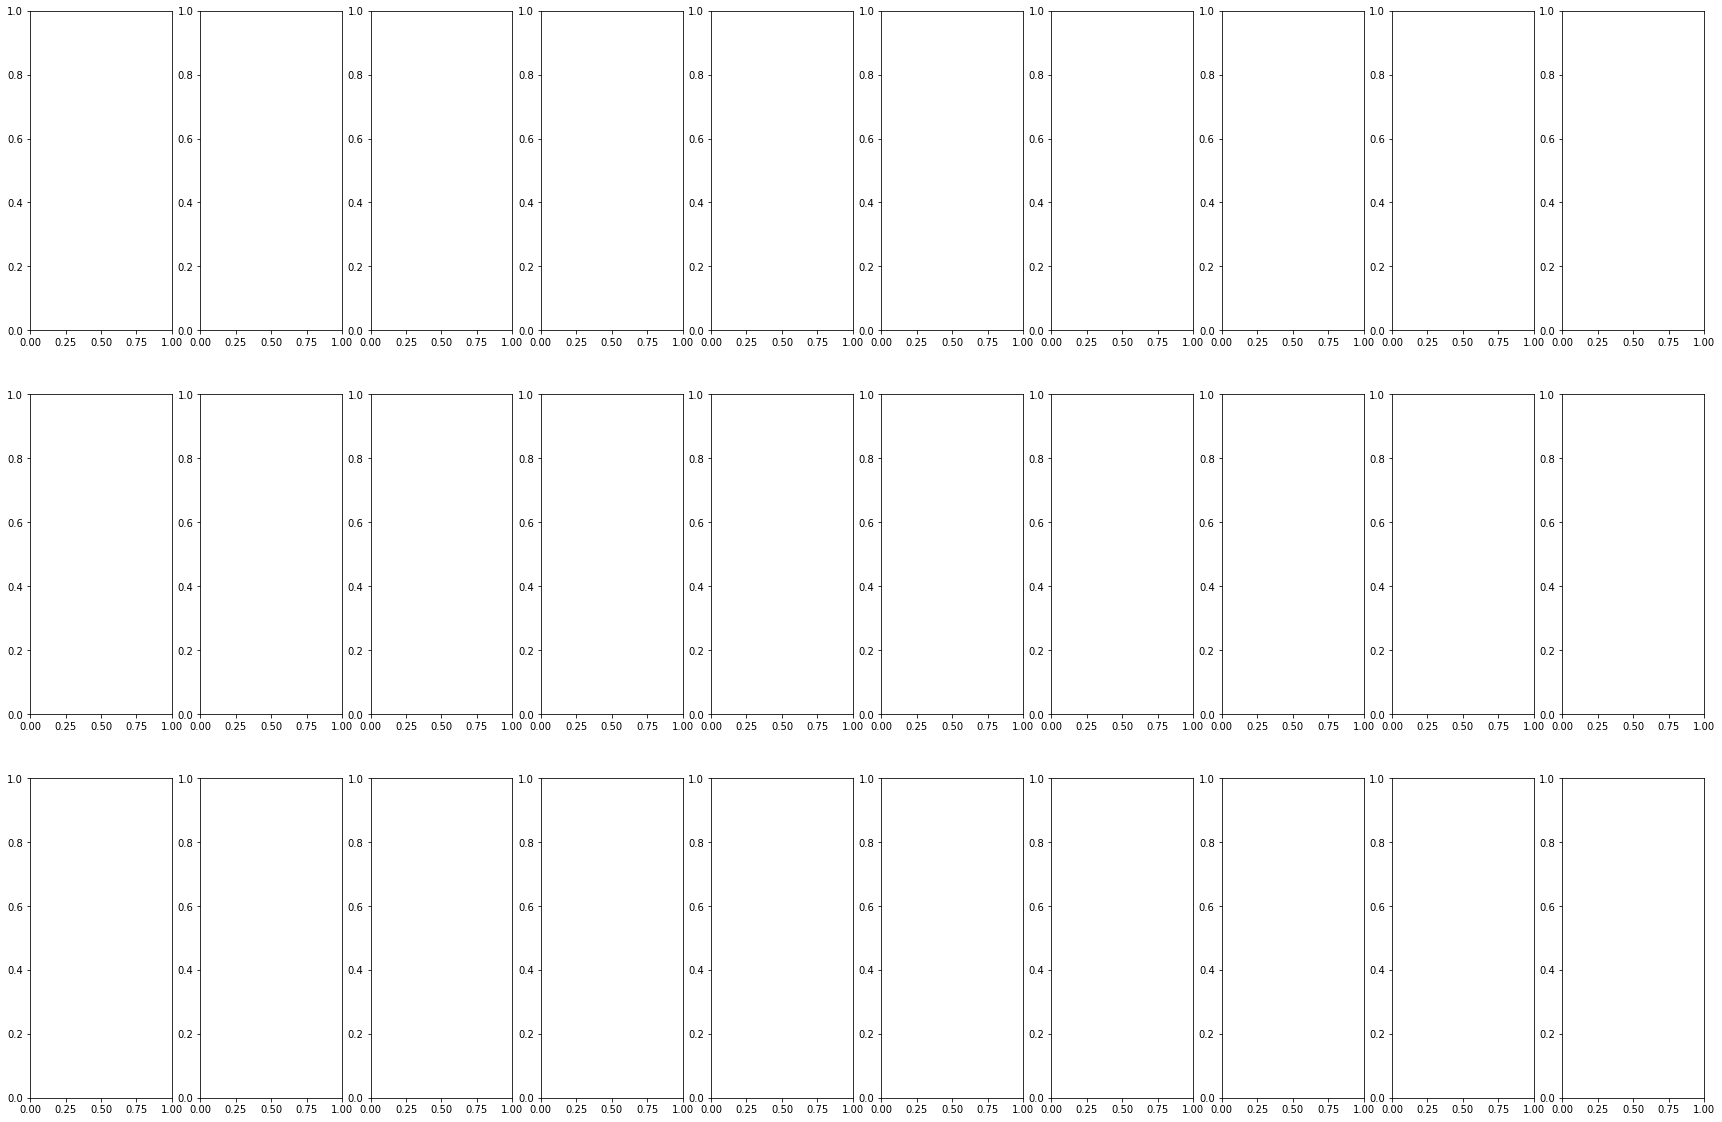

In [4]:
def hyperspectral_vis(results,coord):
    results[:,0] = (results[:,0]-min(results[:,0]))/(max(results[:,0])-min(results[:,0]))
    results[:,1] = (results[:,1]-min(results[:,1]))/(max(results[:,1])-min(results[:,1]))
    results[:,2] = (results[:,2]-min(results[:,2]))/(max(results[:,2])-min(results[:,2]))
    
    results[:,0] *= np.uint8(255/results[:,0].max())
    results[:,1] *= np.uint8(255/results[:,1].max())
    results[:,2] *= np.uint8(255/results[:,2].max())

    img = np.full((max(coord[:,1]),max(coord[:,0]),3),0,dtype='int')

    for i in range(len(coord)):
        img[coord[i,1]-1,coord[i,0]-1] = results[i]

    return img

fig,axes = plt.subplots(3,10,figsize=(30,20))
ax = axes.ravel()
idx = 0
for group in groups_show:
    data = UMAP_datainfo[group]
    for i in range(10):
        umap_img = IonImg(data['embeddings'][:,i],data['coordinates'],False,False)
        ax[10*idx+i].imshow(umap_img,cmap='RdYlBu_r')
        ax[10*idx+i].axis('off')
    idx+=1
fig.tight_layout()
fig.savefig('../figures/coronal3D_umap_img.pdf')

In [21]:
umap_embedding = []
slice_names = []
for key in UMAP_datainfo.keys():
    umap_embedding.append(UMAP_datainfo[key]['embeddings'])
    slice_names+=[key]*UMAP_datainfo[key]['coordinates'].shape[0]
umap_embedding = np.concatenate(umap_embedding)

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=199).fit(umap_embedding) 

In [43]:
umap_df = pd.DataFrame({'umap_1':umap_embedding[:,1],'umap_2':umap_embedding[:,2],'slice_name':slice_names,'cluster':kmeans.labels_})

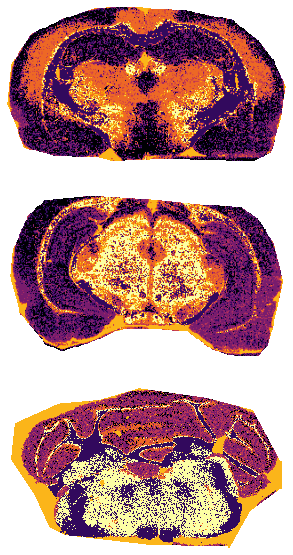

In [76]:
fig,axes = plt.subplots(len(groups_show),1,figsize=(5,10))
ax = axes.ravel()
index = 0
for group in groups_show:
    data = umap_df[umap_df['slice_name']==group]
    ax[index].imshow(IonImg_show(data['cluster'].values,UMAP_datainfo[group]['coordinates']).T,cmap='inferno')
    ax[index].axis('off')
    index+=1

In [34]:
slice_order = ['slide1_2_R00','slide1_2_R01','slide1_2_R02','slide1_2_R03','slide1_2_R04','slide1_2_R05','slide1_2_R06',
              'slide1_2_R07','slide1_2_R08','slide3_5_R00','slide3_5_R10','slide3_5_R01','slide3_5_R02','slide3_5_R03',
              'slide3_5_R04','slide4_6_R00','slide4_6_R11','slide4_6_R01','slide4_6_R02','slide4_6_R03','slide4_6_R04',
              'slide3_5_R05','slide3_5_R06','slide3_5_R07','slide3_5_R08','slide3_5_R11','slide3_5_R09','slide4_6_R05',
              'slide4_6_R06','slide4_6_R07','slide4_6_R08','slide4_6_R09','slide4_6_R10','slide7_R00','slide7_R01',
              'slide7_R02','slide7_R03']

In [35]:
cluster_count = []
cluster_ratio = []
n_cluster = 6

for slice_ in slice_order:
    data = umap_df[umap_df['slice_name']==slice_]
    cluster_count.append(data['cluster'].value_counts())
    cluster_ratio.append(data['cluster'].value_counts()/data.shape[0])

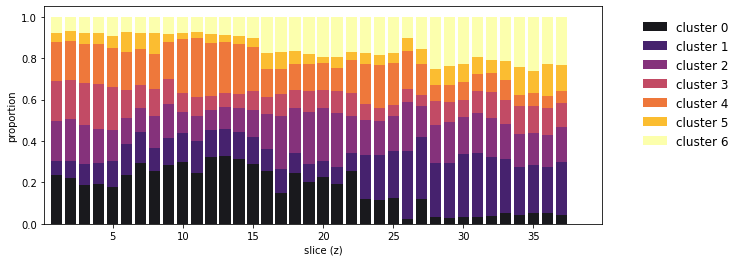

In [77]:
import matplotlib
fig,ax = plt.subplots(figsize=(10,4))
bottom = [0]*len(slice_order)
cmap = matplotlib.cm.get_cmap('inferno')
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=6.0)

for i in range(7):
    plt.bar(np.arange(1,38),[ratio[i] for ratio in cluster_ratio], bottom=bottom,label='cluster {}'.format(i),alpha=0.9,color=cmap(norm(i)))
    bottom = [x + y for x, y in zip(bottom,[ratio[i] for ratio in cluster_ratio])]
plt.legend()
plt.xlim([0.1,39.9])
plt.ylabel('proportion')
plt.xlabel('slice (z)')
plt.legend(frameon=False,fontsize=12,ncol=1,loc='lower center',bbox_to_anchor=(1.15, .3))

In [81]:
np.sum([[1,2,3],[1,2,3]],axis=0)

array([2, 4, 6])

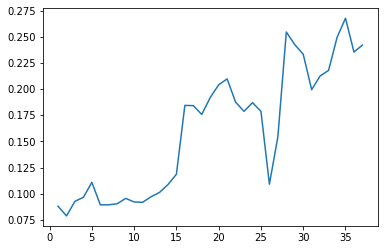

In [69]:
plt.plot(np.arange(1,38),[ratio[i] for ratio in cluster_ratio])